# Ejercicios ensembling
En este ejercicio vas a realizar prediciones sobre un dataset de ciudadanos indios diabéticos. Se trata de un problema de clasificación en el que intentaremos predecir 1 (diabético) 0 (no diabético). Todas las variables son numércias.

### 1. Carga las librerias que consideres comunes al notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv")
df

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


### 2. Lee los datos de [esta direccion](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)
Los nombres de columnas son:
```Python
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
```

In [3]:
df.columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    767 non-null    int64  
 1   plas    767 non-null    int64  
 2   pres    767 non-null    int64  
 3   skin    767 non-null    int64  
 4   test    767 non-null    int64  
 5   mass    767 non-null    float64
 6   pedi    767 non-null    float64
 7   age     767 non-null    int64  
 8   class   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

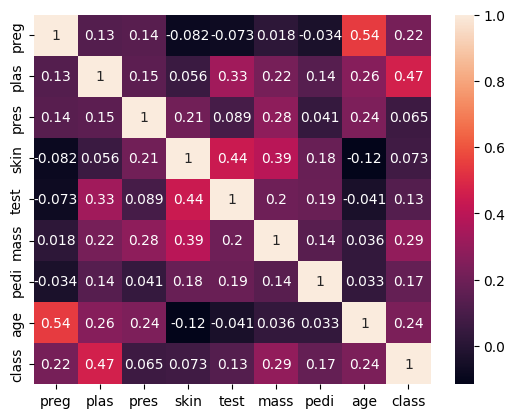

In [9]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

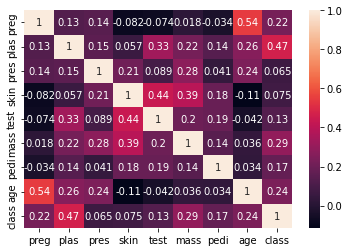

### 3. Bagging
Para este apartado tendrás que crear un ensemble utilizando la técnica de bagging ([BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)), mediante la cual combinarás 100 [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Recuerda utilizar también [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) con 10 kfolds.

**Para este apartado y siguientes, no hace falta que dividas en train/test**, por hacerlo más sencillo. Simplemente divide tus datos en features y target.

Establece una semilla

In [10]:
features = df.drop("class",axis=1)
target = df["class"]

In [13]:
features.shape

(767, 8)

In [14]:
target.shape

(767,)

In [ ]:
# Separa los datos en features (X) y target (y)
# Nuestro target es df["class"]
# Muestra el shape de ambos conjuntos

(768, 8)
(768,)


In [ ]:
# Vamos a grabar la semilla 7 para todos los modelos en la variable seed

In [15]:
seed = 7

In [21]:
# Instancia un Decision Tree Classifier

# Instancia un Bagging Classifier cuyo base estimator sea el DecisionTreeClassifier() , el número de estimadores sea 100 y el random state sea la semilla seed que hemos creado

# Instancia 10 KFolds en la variable kfold

# Cálcula el cross validation score del Bagging Classifier con X e y, el cv sea igual a kfold y el scoring sea 'accuracy'

# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



In [49]:
estimator = DecisionTreeClassifier(max_depth=3,random_state=seed)
bag_clf = BaggingClassifier(
    estimator = estimator,
    n_estimators=100, # Cantidad de árboles
    bootstrap=True, # Usamos boostrapping. obligaorio a True siempre
    max_features = 3, # Features que utiliza en el boostrapping. Cuanto más bajo, mejor generalizará y menos overfitting
    random_state=seed)
kf = KFold(n_splits=10,shuffle=True, random_state=seed)
kf.get_n_splits(features)
kf.split(features,target)



<generator object _BaseKFold.split at 0x000001C179DA73E0>

In [50]:
for i, (train_index, test_index) in enumerate(kf.split(features,target)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  54  55  56
  58  59  60  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  95
  96  97  99 100 101 102 103 104 105 106 107 108 109 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 126 127 128 129 130 131 132 133 134
 135 136 137 139 141 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 180 181 182 183 184 185 186 187 188 189 190 191 193
 194 195 196 197 198 199 200 201 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 237 238 239 240 241 243 244 245 246 247 248 249 250 252 253
 254 255 256 257 258 260 261

In [52]:
bag_clf.fit(features,target)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3, random_state=7),
                  max_features=3, n_estimators=100, random_state=7)

In [54]:
y_pred = bag_clf.predict(features)

In [55]:
accuracy_score(y_pred, target)

0.7861799217731421

In [ ]:
DecisionTreeClassifier??

In [ ]:
BaggingClassifier??


In [ ]:
# Obtén la media del cross validation score para el Bagging Classifier
# Simplemente en la variable en la que guardaste el CV usa el método < .mean() >

0.7720437457279563

### 4. Random Forest
En este caso entrena un [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) con 100 árboles y un `max_features` de 3. También con validación cruzada

In [58]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100,
                                 max_features=3,
                                #  max_leaf_nodes=16,
                                 random_state=seed)
rnd_clf.fit(features, target)

y_pred_rf = rnd_clf.predict(features)
# np.sum(y_test == y_pred_rf) / len(y_test) 
accuracy_score(target, y_pred_rf)

1.0

In [ ]:
# Instancia un Random Forest Classifier con 100 árboles, max features de 3 y que el random state sea la seed que hemos creado

# Cálcula el cross validation score del Random Forest Classifier con X e y, y que el cv sea igual a kfold

# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

In [ ]:
# Obtén la media del cross validation score para el Random Forest Classifier

0.7733766233766234

### 5. AdaBoost
Implementa un [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) con 30 árboles.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Instancia un AdaBoost Classifier con 30 árboles y que el random state sea la seed que hemos creado

# Cálcula el cross validation score del AdaBoost Classifier con X e y, y que el cv sea igual a kfold

# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

In [59]:
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier

estimator = DecisionTreeClassifier(max_depth=1)

ada_clf = AdaBoostClassifier(estimator = estimator,
                             n_estimators=30,
                             learning_rate=0.3,
                             random_state=seed)

ada_clf = GradientBoostingClassifier(n_estimators=100)




ada_clf.fit(features,target)

y_pred = ada_clf.predict(features)
accuracy_score(target, y_pred)

0.894393741851369

In [ ]:
# Obtén la media del cross validation score para el AdaBoost Classifier

0.760457963089542

### 6. GradientBoosting
Implementa un [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) con 100 estimadores

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Instancia un GradientBoosting Classifier con 100 estimadores y que el random state sea la seed que hemos creado

# Cálcula el cross validation score del GradientBoosting Classifier con X e y, y que el cv sea igual a kfold

# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

gbct = GradientBoostingClassifier(
                                 random_state=seed)
gbct.fit(features, target)


y_pred_gbct = gbct.predict(features)
accuracy_score(target, y_pred_gbct)

0.894393741851369

In [ ]:
# La misma vaina que estamos haciendo, saca el mean() de la variable del cross_validation

0.7681989063568012

### 7. XGBoost
Para este apartado utiliza un [XGBoostClassifier](https://docs.getml.com/latest/api/getml.predictors.XGBoostClassifier.html) con 100 estimadores. XGBoost no forma parte de la suite de modelos de sklearn, por lo que tendrás que instalarlo con pip install

In [ ]:
# Descomenta la siguiente wea (palabra chilena, no es ningun termino de Machine Learning) para instalar el XGBoost

In [ ]:
#!pip install xgboost

In [65]:
from xgboost import XGBClassifier
import xgboost

xgb_reg = xgboost.XGBRegressor(random_state=seed)

xgb_reg.fit(features, target)
y_pred = xgb_reg.predict(features)
# accuracy_score(target, y_pred) 
xgb_reg.score(features, target)

0.9987826920575056

In [ ]:
# Instancia un XGBoost Classifier con 100 estimadores y que el random state sea la seed que hemos creado

# Cálcula el cross validation score del XGBoost Classifier con X e y, y que el cv sea igual a kfold

# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

In [ ]:
# la mean de la wea que acabamos de hacer

0.7395591250854407

### 8. Resultados
Crea un series con los resultados y sus algoritmos, ordenándolos de mayor a menor

In [45]:
result = [results_cv.mean(), results_cv_rfc.mean(), results_cv_ada.mean(), results_cv_gb.mean(), results_cv_xgb.mean()]
models = ['Bagging DT', "Random Forest", "Ada Boost", "GradientBoosting", "XGBoost"]

resultados = pd.Series(result, models).sort_values(ascending=False)
resultados

Random Forest       0.773377
Bagging DT          0.772044
GradientBoosting    0.768199
Ada Boost           0.760458
XGBoost             0.739559
dtype: float64

In [ ]:
# Si quieres seguir diviertiendote puedes hacer lo siguiente:

# Continue with:
# split train test
# .fit
# evaluation with test